<a href="https://colab.research.google.com/github/sam1610/Inference_DIRinfo/blob/master/TimeSeries_Modeling_FB_Prophet_(df_avt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  LIbrary loading...

In [1]:
pip install download

In [2]:
!pip install fbprophet 

In [3]:
ls

sample_data/


In [84]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from datetime import datetime  
from datetime import timedelta  
import pandas as pd
import plotly.express as px
from download import download
import random
import plotly.offline as pyoff
import plotly.graph_objs as go
mpl.rcParams["figure.figsize"]=(10, 8)
mpl.rcParams["axes.grid"]=False


In [5]:
ls ./sample_data/

anscombe.json*                data/                  README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [6]:
path=download("https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip", "./sample_data/data", kind="zip", replace=True)


file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 5.30MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./sample_data/data


In [7]:
!ls ./sample_data/data/PRSA_Data_20130301-20170228/


PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [8]:
def convert_to_date(x):
  return datetime.strptime(x, "%Y %m %d %H")

In [9]:
pd.read_csv("./sample_data/data/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv").head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
df_sh=pd.read_csv("./sample_data/data/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv", 
                  parse_dates=[["year", "month", "day", "hour"]], date_parser=convert_to_date)

In [13]:
df_gu=pd.read_csv("./sample_data/data/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv", 
                  parse_dates=[["year", "month", "day", "hour"]], date_parser=convert_to_date)

In [14]:
df_wa=pd.read_csv("./sample_data/data/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv", 
                  parse_dates=[["year", "month", "day", "hour"]], date_parser=convert_to_date)

##   Dataframe

In [15]:
df=pd.concat([df_sh, df_wa, df_gu], ignore_index=True, sort=False )

In [16]:
df_sh.shape

(35064, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   year_month_day_hour  105192 non-null  datetime64[ns]
 1   No                   105192 non-null  int64         
 2   PM2.5                103251 non-null  float64       
 3   PM10                 103979 non-null  float64       
 4   SO2                  102814 non-null  float64       
 5   NO2                  102089 non-null  float64       
 6   CO                   99801 non-null   float64       
 7   O3                   100867 non-null  float64       
 8   TEMP                 105070 non-null  float64       
 9   PRES                 105071 non-null  float64       
 10  DEWP                 105067 non-null  float64       
 11  RAIN                 105078 non-null  float64       
 12  wd                   104427 non-null  object        
 13  WSPM          

##Data_process

In [21]:
df["Act_type"]=[ random.choice([0,1]) for r in range(df.shape[0])]
df.rename({    
    "PM2.5":"Act_avg_time",
    "O3": "Act_min_time",

    "DEWP" :"Act_min_mark",
    "WSPM": "Act_avg_mark",
    "RAIN" : "Act_avg_diff",
    "NO2" : "Act_avg_cp",
    "station": "Course_code",
    "year_month_day_hour": "timeStamp"}, axis=1, inplace=True)

In [22]:
df.keys()

Index(['timeStamp', 'No', 'Act_avg_time', 'PM10', 'SO2', 'Act_avg_cp', 'CO',
       'Act_min_time', 'TEMP', 'PRES', 'Act_min_mark', 'Act_avg_diff', 'wd',
       'Act_avg_mark', 'Course_code', 'Act_type'],
      dtype='object')

In [23]:
df.drop(['No', 'PM10','SO2','CO', 'TEMP', 'PRES', 'wd' ], axis=1, inplace=True )

In [24]:
df["Act_avg_mark"]= [ 8*np.random.rand()+2   for i in range(df.shape[0]) ]
df["Act_avg_diff"]= [ 4*np.random.rand()+1   for i in range(df.shape[0]) ]
df["Act_min_mark"]= [ 4*np.random.rand()   for i in range(df.shape[0]) ]
df["Act_min_mark"]= [ 4*np.random.rand()   for i in range(df.shape[0]) ]
df["Act_avg_cp"]= [ 3*np.random.rand()   for i in range(df.shape[0]) ]
df["Course_code"]= [random.choice(["g5_1", "g5_3", "g5_4"])   for i in range(df.shape[0]) ]
df["timeStamp"]= [ df.loc[i, "timeStamp"]+ pd.Timedelta(days=365*6)   for i in range(df.shape[0]) ]

In [25]:
df= df[df.timeStamp <"2021-05-30"]

In [26]:
df.sample()

,timeStamp,Act_avg_time,Act_avg_cp,Act_min_time,Act_min_mark,Act_avg_diff,Act_avg_mark,Course_code,Act_type
15108,2020-11-18 12:00:00,269.0,1.467715,11.0,3.044149,3.981791,4.922734,g5_3,0


In [27]:
df[df.columns[df.isna().any()]]

,Act_avg_time,Act_min_time
0,3.0,44.0
1,12.0,47.0
2,14.0,22.0
3,12.0,NaN
4,12.0,11.0
...,...,...
89851,62.0,247.0
89852,67.0,210.0
89853,69.0,159.0
89854,70.0,133.0


In [28]:
df.isna().sum()

timeStamp          0
Act_avg_time    1026
Act_avg_cp         0
Act_min_time    2612
Act_min_mark       0
Act_avg_diff       0
Act_avg_mark       0
Course_code        0
Act_type           0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df=df.set_index("timeStamp").groupby("Course_code").resample("w").mean()

In [31]:
df.reset_index(inplace=True)

In [32]:
df.timeStamp.max()

Timestamp('2021-05-30 00:00:00')

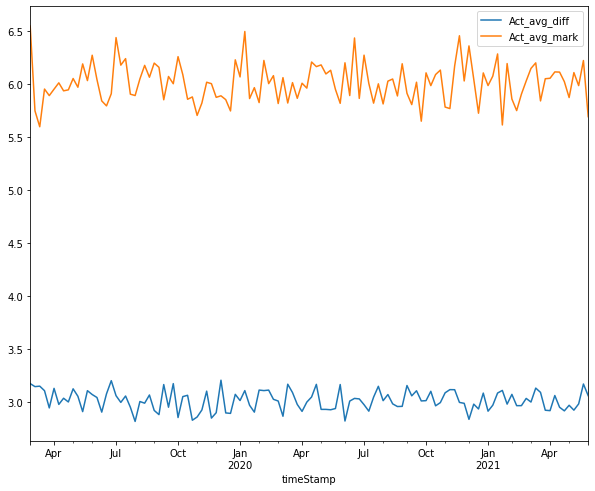

In [33]:
df.set_index("timeStamp").query("Course_code=='g5_3'")[['Act_avg_diff', 'Act_avg_mark']].plot()

In [34]:
df.set_index("timeStamp").groupby("Course_code").resample("w").mean()

Act_avg_time  Act_avg_cp  ...  Act_avg_mark  Act_type
Course_code timeStamp                             ...                        
g5_1        2019-03-03     33.673267    1.526836  ...      6.232715  0.445545
            2019-03-10    151.860606    1.629467  ...      5.847982  0.412121
            2019-03-17    157.413408    1.456776  ...      6.089314  0.441341
            2019-03-24     64.441718    1.395204  ...      5.892832  0.496933
            2019-03-31    100.878205    1.593898  ...      6.111359  0.480769
...                              ...         ...  ...           ...       ...
g5_4        2021-05-02     74.666667    1.427093  ...      5.893227  0.493590
            2021-05-09     38.247159    1.567394  ...      5.932005  0.460227
            2021-05-16     56.000000    1.416909  ...      6.095307  0.464516
            2021-05-23     71.950617    1.549932  ...      5.831221  0.493827
            2021-05-30     82.934783    1.454555  ...      5.749836  0.492754

[354 rows x 7 columns]

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Act_avg_time,354.0,83.963591,35.234493,30.556886,61.632775,74.624762,98.987803,235.612500
Act_avg_cp,354.0,1.504824,0.065926,1.340294,1.459459,1.505517,1.545718,1.713276
Act_min_time,354.0,52.526688,29.149340,8.331461,25.983024,48.052326,76.009516,132.688406
Act_min_mark,354.0,2.000291,0.094738,1.732645,1.935515,1.998063,2.056266,2.325615
Act_avg_diff,354.0,3.000786,0.093056,2.732262,2.930489,2.996740,3.066020,3.272756
Act_avg_mark,354.0,5.997772,0.181595,5.398801,5.886740,6.003205,6.107622,6.547084
Act_type,354.0,0.499540,0.041748,0.383178,0.471338,0.500000,0.529650,0.608696


Course_code
g5_1    AxesSubplot(0.125,0.125;0.775x0.755)
g5_3    AxesSubplot(0.125,0.125;0.775x0.755)
g5_4    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

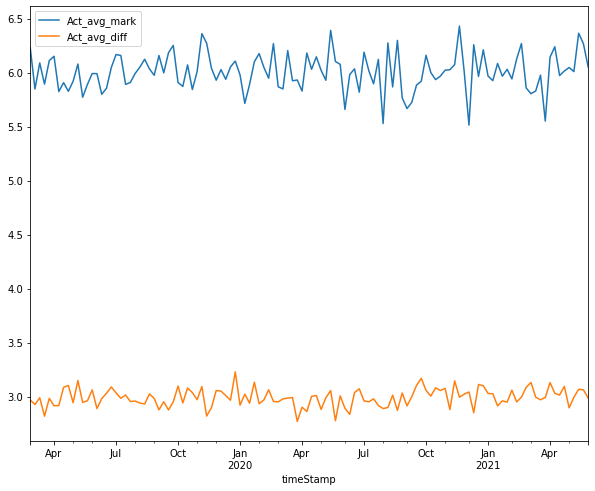

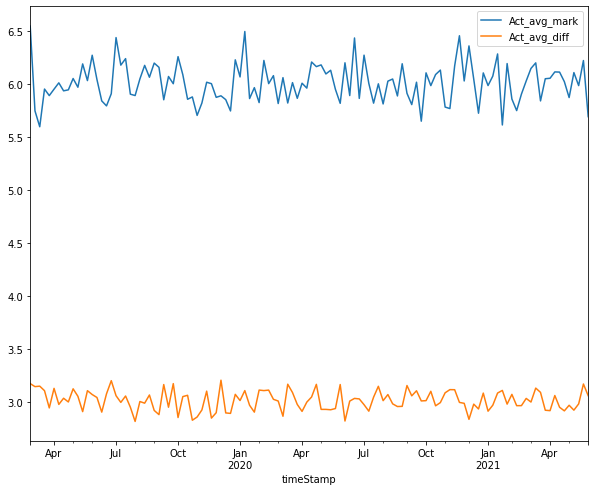

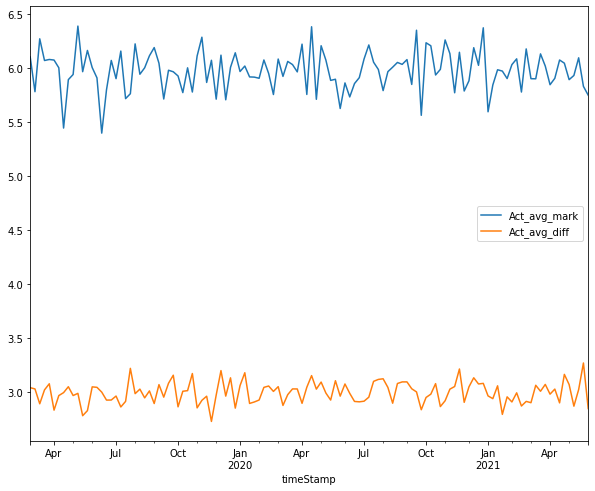

In [36]:
df.iloc[:, :-1].set_index("timeStamp").groupby("Course_code")[['Act_avg_mark', 'Act_avg_diff']].plot()

In [37]:
df.Course_code.unique()

array(['g5_1', 'g5_3', 'g5_4'], dtype=object)

In [38]:
df.keys()

Index(['Course_code', 'timeStamp', 'Act_avg_time', 'Act_avg_cp',
       'Act_min_time', 'Act_min_mark', 'Act_avg_diff', 'Act_avg_mark',
       'Act_type'],
      dtype='object')

In [39]:
from fbprophet import Prophet

In [40]:
df=df[['Course_code', 'timeStamp', 'Act_avg_time', 'Act_avg_cp',
       'Act_min_time', 'Act_min_mark', 'Act_avg_diff', 'Act_avg_mark',
       'Act_type']].rename(
    {
        'timeStamp':'ds', 'Act_avg_mark': 'y'
    }, axis='columns'
)

In [41]:
df.head()

,Course_code,ds,Act_avg_time,Act_avg_cp,Act_min_time,Act_min_mark,Act_avg_diff,y,Act_type
0,g5_1,2019-03-03,33.673267,1.526836,41.227723,1.940486,2.967793,6.232715,0.445545
1,g5_1,2019-03-10,151.860606,1.629467,66.430303,2.074130,2.925241,5.847982,0.412121
2,g5_1,2019-03-17,157.413408,1.456776,65.553073,2.094816,2.988684,6.089314,0.441341
3,g5_1,2019-03-24,64.441718,1.395204,37.697683,1.955043,2.818330,5.892832,0.496933
4,g5_1,2019-03-31,100.878205,1.593898,38.736673,2.110661,2.983131,6.111359,0.480769


In [42]:
courses=df.groupby('Course_code')
courses.head()

,Course_code,ds,Act_avg_time,Act_avg_cp,Act_min_time,Act_min_mark,Act_avg_diff,y,Act_type
0,g5_1,2019-03-03,33.673267,1.526836,41.227723,1.940486,2.967793,6.232715,0.445545
1,g5_1,2019-03-10,151.860606,1.629467,66.430303,2.074130,2.925241,5.847982,0.412121
2,g5_1,2019-03-17,157.413408,1.456776,65.553073,2.094816,2.988684,6.089314,0.441341
3,g5_1,2019-03-24,64.441718,1.395204,37.697683,1.955043,2.818330,5.892832,0.496933
4,g5_1,2019-03-31,100.878205,1.593898,38.736673,2.110661,2.983131,6.111359,0.480769
118,g5_3,2019-03-03,40.336735,1.604348,42.132653,2.089094,3.171344,6.547084,0.387755
119,g5_3,2019-03-10,149.761290,1.481472,59.606452,2.018944,3.142974,5.746691,0.503226
120,g5_3,2019-03-17,156.323171,1.445983,71.969512,1.839232,3.147311,5.596633,0.512195
121,g5_3,2019-03-24,69.388535,1.519559,38.498766,1.974022,3.104559,5.952511,0.471338
122,g5_3,2019-03-31,107.929730,1.590795,37.112169,1.967348,2.941866,5.890754,0.529730


In [43]:
for s in courses.groups:
  print(s)


g5_1
g5_3
g5_4


In [44]:
courses.get_group("g5_1")

,Course_code,ds,Act_avg_time,Act_avg_cp,Act_min_time,Act_min_mark,Act_avg_diff,y,Act_type
0,g5_1,2019-03-03,33.673267,1.526836,41.227723,1.940486,2.967793,6.232715,0.445545
1,g5_1,2019-03-10,151.860606,1.629467,66.430303,2.074130,2.925241,5.847982,0.412121
2,g5_1,2019-03-17,157.413408,1.456776,65.553073,2.094816,2.988684,6.089314,0.441341
3,g5_1,2019-03-24,64.441718,1.395204,37.697683,1.955043,2.818330,5.892832,0.496933
4,g5_1,2019-03-31,100.878205,1.593898,38.736673,2.110661,2.983131,6.111359,0.480769
...,...,...,...,...,...,...,...,...,...
113,g5_1,2021-05-02,67.329268,1.434699,81.560976,1.934551,2.895312,6.046858,0.579268
114,g5_1,2021-05-09,37.526667,1.478372,57.280000,1.995716,2.992993,6.008712,0.446667
115,g5_1,2021-05-16,45.885906,1.625772,84.456376,1.953963,3.067414,6.364122,0.516779
116,g5_1,2021-05-23,63.445122,1.539816,119.079268,2.076563,3.061690,6.266697,0.500000


In [45]:
df.ds.max()

Timestamp('2021-05-30 00:00:00')

In [46]:
for s in courses.groups:
  gp=courses.get_group(s)
  train=gp[(gp['ds']<='2020-12-01')]
  test=gp[(gp['ds']>='2021-01-01')]
  print(test.shape)


(22, 9)
(22, 9)
(22, 9)


In [47]:
target=pd.DataFrame()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


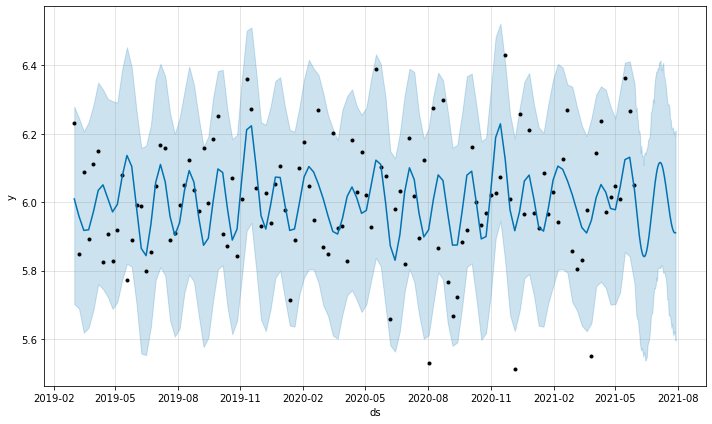

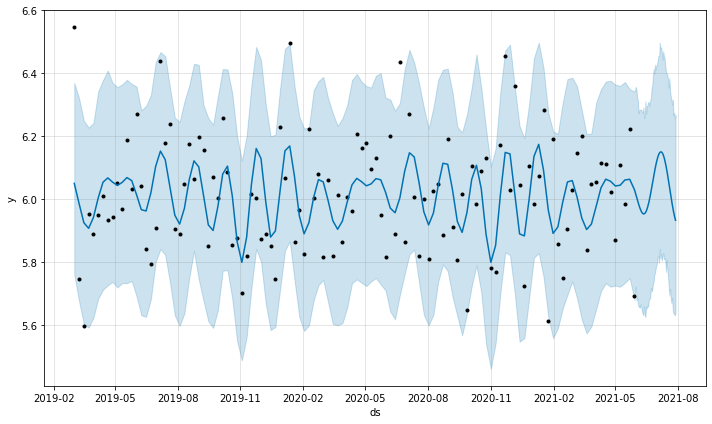

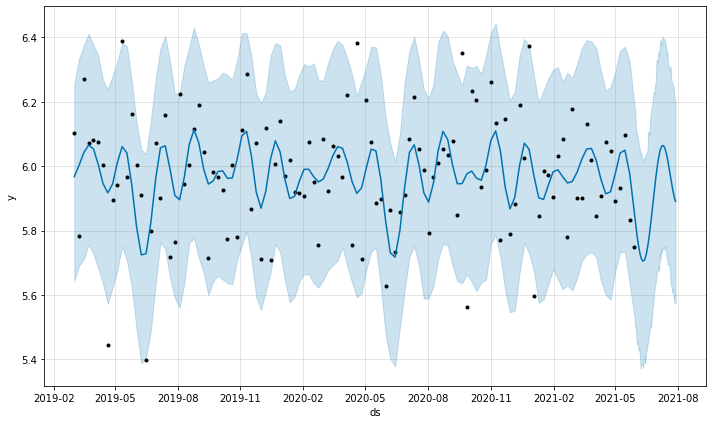

In [48]:
for s in courses.groups:
  gp=courses.get_group(s)
  m=Prophet(interval_width=0.95 )
  m.fit(gp)
  future=m.make_future_dataframe(periods=60)
  forecast= m.predict(future)
  m.plot(forecast)
  forecast=forecast.rename( columns={'yhat': 'yhat_'+s})
  target=pd.merge(target, forecast.set_index('ds'), 
                  how='outer', left_index=True, 
                  right_index=True)

In [49]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_g5_4
0,2019-03-03,5.976328,5.643979,6.256376,5.976328,5.976328,-0.009012,-0.009012,-0.009012,-0.009012,-0.009012,-0.009012,0.0,0.0,0.0,5.967316
1,2019-03-10,5.976270,5.690685,6.333949,5.976270,5.976270,0.026160,0.026160,0.026160,0.026160,0.026160,0.026160,0.0,0.0,0.0,6.002430
2,2019-03-17,5.976213,5.710629,6.375033,5.976213,5.976213,0.065915,0.065915,0.065915,0.065915,0.065915,0.065915,0.0,0.0,0.0,6.042127
3,2019-03-24,5.976155,5.756432,6.410755,5.976155,5.976155,0.089174,0.089174,0.089174,0.089174,0.089174,0.089174,0.0,0.0,0.0,6.065329
4,2019-03-31,5.976097,5.727264,6.376393,5.976097,5.976097,0.077767,0.077767,0.077767,0.077767,0.077767,0.077767,0.0,0.0,0.0,6.053864


In [50]:
target.sample()

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,yearly_x,yearly_lower_x,yearly_upper_x,multiplicative_terms_x,multiplicative_terms_lower_x,multiplicative_terms_upper_x,yhat_g5_1,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yhat_g5_3,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_g5_4
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-16,6.005181,5.803301,6.390525,6.005181,6.005181,0.082858,0.082858,0.082858,0.082858,0.082858,0.082858,0.0,0.0,0.0,6.088039,6.011985,5.6793,6.346147,6.011985,6.011985,-0.005381,-0.005381,-0.005381,-0.005381,-0.005381,-0.005381,0.0,0.0,0.0,6.006604,5.973449,5.635902,6.318341,5.973449,5.973449,-0.006488,-0.006488,-0.006488,-0.006488,-0.006488,-0.006488,0.0,0.0,0.0,5.966961


In [51]:
courses.groups.keys()

dict_keys(['g5_1', 'g5_3', 'g5_4'])

In [52]:
target=target[['yhat_' + s for s in courses.groups.keys()]]

In [53]:
target.sample(5)

,yhat_g5_1,yhat_g5_3,yhat_g5_4
ds,,,
2020-12-27,6.079344,6.001080,6.051859
2020-12-13,5.972815,5.890221,6.002190
2021-04-25,5.981507,6.057385,5.920382
2020-07-12,6.066204,6.134660,6.066265
2021-06-18,5.870301,5.973716,5.746092


In [54]:
pd.concat([df.set_index('ds').query("Course_code=='g5_1'")['y'], target['yhat_g5_1']], axis=1).head()

,y,yhat_g5_1
ds,,
2019-03-03,6.232715,6.009403
2019-03-10,5.847982,5.958320
2019-03-17,6.089314,5.917369
2019-03-24,5.892832,5.919241
2019-03-31,6.111359,5.971913


In [64]:
# concat
df_plot= pd.concat([df.set_index('ds').query("Course_code=='g5_1'")['y'], target['yhat_g5_1']], axis=1)

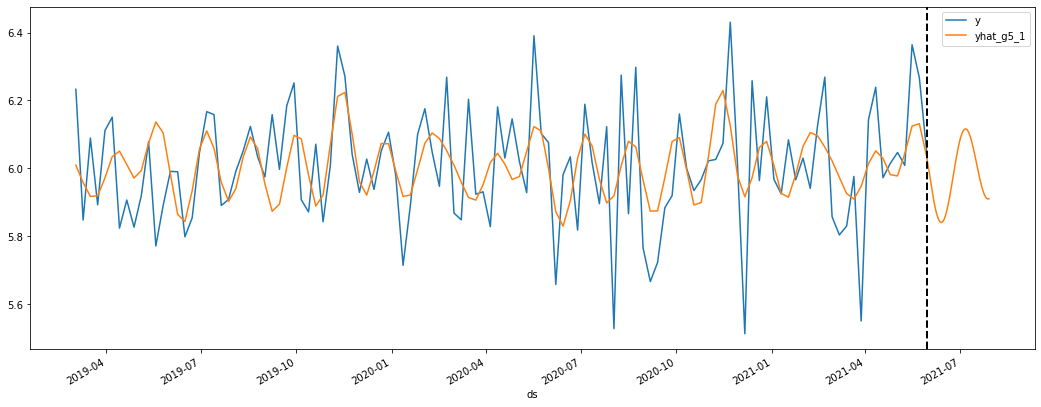

In [87]:
fig, ax = plt.subplots()
df_plot.plot(figsize=(18, 7), ax=ax )
ax.axvline(x=df_plot.index.max() - pd.Timedelta('60 days'), c='black', lw=2, ls='--')

In [63]:
df_plot.index.max()

Timestamp('2021-07-29 00:00:00')

In [77]:
fig = go.Figure()
#Create and style traces
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.y, name='Avg Marks G5_1'))
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.yhat_g5_1, name='Predicted Avg Marks G5_1'))
fig.show()

In [76]:
df_plot.head(8)

,y,yhat_g5_1
ds,,
2019-03-03,6.232715,6.009403
2019-03-10,5.847982,5.958320
2019-03-17,6.089314,5.917369
2019-03-24,5.892832,5.919241
2019-03-31,6.111359,5.971913
2019-04-07,6.150660,6.034466
2019-04-14,5.824156,6.050761
2019-04-21,5.906778,6.011504


In [ ]:
x = [ i for i in range(-10,10) ]

y = [ i*2 for i in range(-10,10) ]

xaxis = go.layout.XAxis(title="X Axis")
yaxis = go.layout.YAxis(title="Y Axis")

fig = go.Figure(layout=go.Layout(title="Simple Line Plot", xaxis=xaxis, yaxis=yaxis))
fig.add_trace(go.Scatter(x=x, y=y))

# Nultiple Time Series Using DeepAR


In [ ]:
pip install -U mxnet

Requirement already up-to-date: mxnet in /usr/local/lib/python3.7/dist-packages (1.8.0.post0)


In [ ]:
pip install gluonts

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip

--2021-05-24 07:38:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261335609 (249M) [application/x-httpd-php]
Saving to: ‘LD2011_2014.txt.zip.2’

LD2011_2014.txt.zip 100%[===================>] 249.23M  91.0MB/s    in 2.7s    

2021-05-24 07:38:09 (91.0 MB/s) - ‘LD2011_2014.txt.zip.2’ saved [261335609/261335609]



In [ ]:
!unzip LD2011_2014.txt.zip

Archive:  LD2011_2014.txt.zip
replace LD2011_2014.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!head LD2011_2014.txt

"";"MT_001";"MT_002";"MT_003";"MT_004";"MT_005";"MT_006";"MT_007";"MT_008";"MT_009";"MT_010";"MT_011";"MT_012";"MT_013";"MT_014";"MT_015";"MT_016";"MT_017";"MT_018";"MT_019";"MT_020";"MT_021";"MT_022";"MT_023";"MT_024";"MT_025";"MT_026";"MT_027";"MT_028";"MT_029";"MT_030";"MT_031";"MT_032";"MT_033";"MT_034";"MT_035";"MT_036";"MT_037";"MT_038";"MT_039";"MT_040";"MT_041";"MT_042";"MT_043";"MT_044";"MT_045";"MT_046";"MT_047";"MT_048";"MT_049";"MT_050";"MT_051";"MT_052";"MT_053";"MT_054";"MT_055";"MT_056";"MT_057";"MT_058";"MT_059";"MT_060";"MT_061";"MT_062";"MT_063";"MT_064";"MT_065";"MT_066";"MT_067";"MT_068";"MT_069";"MT_070";"MT_071";"MT_072";"MT_073";"MT_074";"MT_075";"MT_076";"MT_077";"MT_078";"MT_079";"MT_080";"MT_081";"MT_082";"MT_083";"MT_084";"MT_085";"MT_086";"MT_087";"MT_088";"MT_089";"MT_090";"MT_091";"MT_092";"MT_093";"MT_094";"MT_095";"MT_096";"MT_097";"MT_098";"MT_099";"MT_100";"MT_101";"MT_102";"MT_103";"MT_104";"MT_105";"MT_106";"MT_107";"MT_108";"MT_109";"MT_110";"MT_111

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False


/usr/local/lib/python3.7/dist-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [ ]:
df=pd.read_csv('LD2011_2014.txt', sep=';' , index_col=0, parse_dates=True, decimal=',')

In [ ]:
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,...,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.629630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,119.212963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.314815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,122.685185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.keys()

Index(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007',
       'MT_008', 'MT_009', 'MT_010',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=370)

In [ ]:
df.shape

(140256, 370)

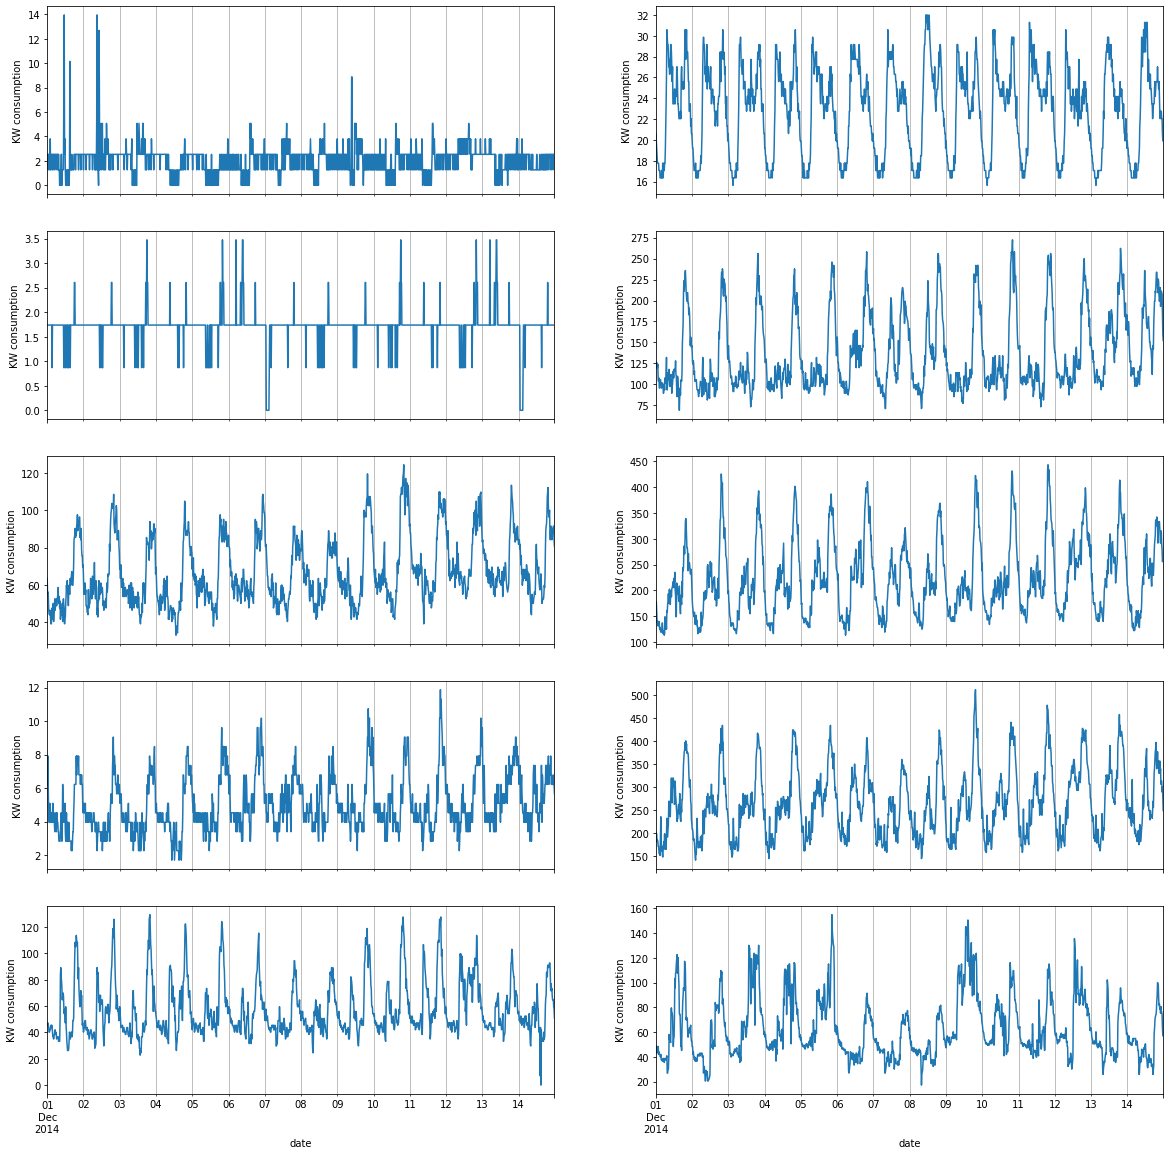

In [ ]:
fig, axs=plt.subplots( 5,2, figsize=(20,20), sharex=True)
axx=axs.ravel()
for i in range(0,10):
  df[df.columns[i]].loc["2014-12-01": "2014-12-14"].plot(ax=axx[i])
  axx[i].set_xlabel("date")
  axx[i].set_ylabel("KW consumption")
  axx[i].grid(which='minor', axis='x')

In [ ]:
df_input=df.reset_index(drop=True).T.reset_index()
df_input.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,140216,140217,140218,140219,140220,140221,140222,140223,140224,140225,140226,140227,140228,140229,140230,140231,140232,140233,140234,140235,140236,140237,140238,140239,140240,140241,140242,140243,140244,140245,140246,140247,140248,140249,140250,140251,140252,140253,140254,140255
0,MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.269036,1.269036,1.269036,2.538071,3.807107,6.345178,2.538071,2.538071,2.538071,3.807107,2.538071,2.538071,2.538071,1.269036,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071,3.807107,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
1,MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.027027,25.604552,27.027027,26.315789,29.160740,29.160740,29.871977,29.160740,29.160740,28.449502,28.449502,29.871977,29.160740,26.315789,27.738265,27.738265,29.160740,28.449502,29.160740,29.160740,28.449502,28.449502,27.027027,26.315789,25.604552,25.604552,23.470839,22.759602,23.470839,22.759602,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
2,MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,1.737619,2.606429,1.737619,2.606429,3.475239,2.606429,2.606429,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
3,MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.113821,128.048780,146.341463,144.308943,146.341463,144.308943,126.016260,140.243902,152.439024,162.601626,162.601626,164.634146,152.439024,160.569106,189.024390,205.284553,199.186992,205.284553,217.479675,215.447154,227.642276,205.284553,193.089431,195.121951,193.089431,189.024390,168.699187,162.601626,168.699187,160.569106,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
4,MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.170732,69.512195,57.317073,59.756098,60.975610,60.975610,62.195122,54.878049,63.414634,71.951220,75.609756,68.292683,63.414634,65.853659,74.390244,85.365854,87.804878,86.585366,89.024390,92.682927,102.439024,95.121951,91.463415,96.341463,91.463415,90.243902,90.243902,87.804878,87.804878,82.926829,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341


In [ ]:
ts_code=df_input["index"].astype('category').cat.codes.values
ts_code

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
X_train=df_input.iloc[:, 1:134999].values
X_test=df_input.iloc[:, 134999:].values

In [ ]:
X_train.shape, X_test.shape

((370, 134998), (370, 5258))

In [ ]:
freq="15min"
start_train=pd.Timestamp("2012-01-01 00:15:00", freq=freq)
start_test=pd.Timestamp("2014-11-07 05:30:00", freq=freq)
prediction_length=672

In [ ]:
estimator= DeepAREstimator( 
    freq=freq,
    context_length=672,
    prediction_length= prediction_length,
    use_feat_static_cat=True,
    cardinality=[1],
    num_layers=2,
    num_cells=32,
    cell_type="lstm",
    trainer=Trainer(epochs=5)
)

In [ ]:
X_train[0:7]

array([[  0.        ,   0.        ,   0.        , ...,   2.53807107,
          2.53807107,   1.26903553],
       [  0.        ,   0.        ,   0.        , ...,  17.06970128,
         17.78093883,  17.78093883],
       [  0.        ,   0.        ,   0.        , ...,   1.73761946,
          1.73761946,   1.73761946],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  47.56097561,
         43.90243902,  43.90243902],
       [  0.        ,   0.        ,   0.        , ..., 107.14285714,
        116.07142857,  98.21428571],
       [  0.        ,   0.        ,   0.        , ...,   4.522329  ,
          4.522329  ,   3.95703787]])

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
train_ds=ListDataset([
                      {FieldName.TARGET: target,
                      FieldName.START: start_train, 
                      FieldName.FEAT_STATIC_CAT: fsc}
                      for (target, fsc) in zip(X_train[0:7],
                                               ts_code[0:7].reshape(-1,1))
], freq=freq)

In [ ]:
test_ds= ListDataset([
                      {FieldName.TARGET: target,
                      FieldName.START: start_train, 
                      FieldName.FEAT_STATIC_CAT: fsc}
                      for (target, fsc) in zip(X_test[0:7],
                                               ts_code[0:7].reshape(-1,1))
], freq=freq)

In [ ]:
next(iter(train_ds))

{'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source='list_data', row=0),
 'start': Timestamp('2012-01-01 00:15:00', freq='15T'),
 'target': array([0.       , 0.       , 0.       , ..., 2.5380712, 2.5380712,
        1.2690356], dtype=float32)}

In [ ]:
predictor=estimator.train(training_data=train_ds)

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [01:15<00:00,  1.51s/it, epoch=5/5, avg_epoch_loss=2.12]


In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [ ]:
forecast_it, ts_it= make_evaluation_predictions(
    dataset = test_ds,
    predictor=predictor,
    num_samples=100
)

In [ ]:
from tqdm.autonotebook import tqdm
print(" Obtaining time series conditioning values...")
tss=list(tqdm(ts_it, total=len(X_test)))
print("Obtaining time series predictions...")
forecasts=list(tqdm(forecast_it, total=len(X_test)))

 Obtaining time series conditioning values...



Obtaining time series predictions...


In [ ]:
def plot_prob_forecast(ts_entry, forecast_entry):
  plot_length=prediction_length
  prediction_intervals=(80.0, 95.0)
  legend=[ "Obeservations", "Median Prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

  fig, ax= plt.subplots( 1,1, figsize=(10,7))
  ts_entry[-plot_length:].plot(ax=ax)
  forecast_entry.plot(prediction_intervals= prediction_intervals, color='g')
  plt.grid( which="both")
  plt.legend( legend, loc="upper left")
  plt.show()





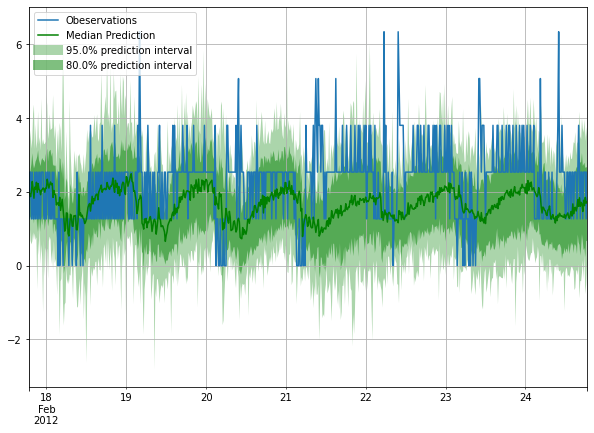

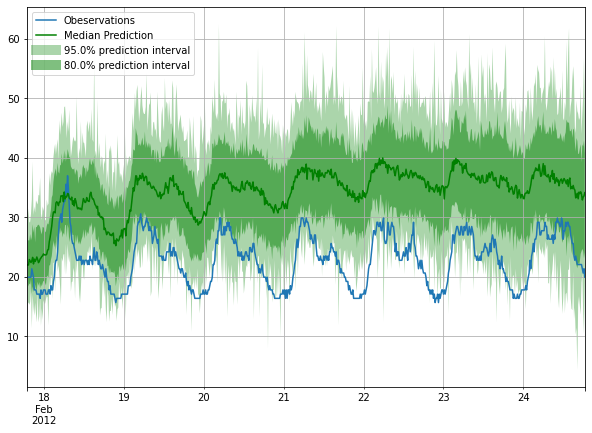

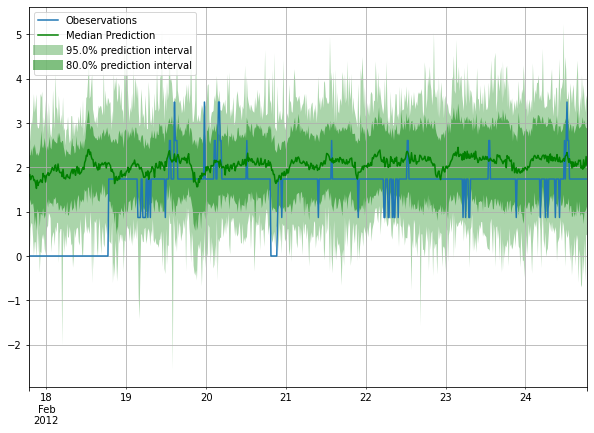

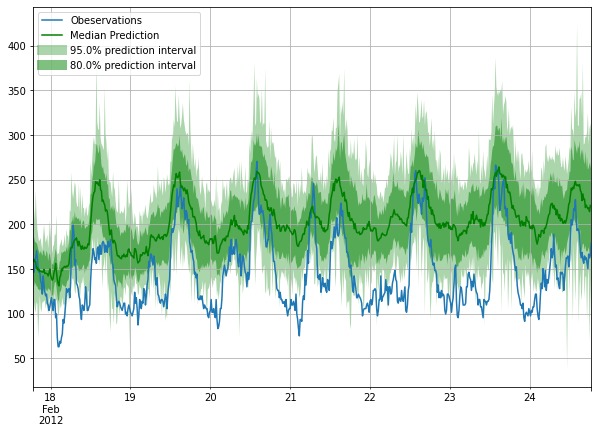

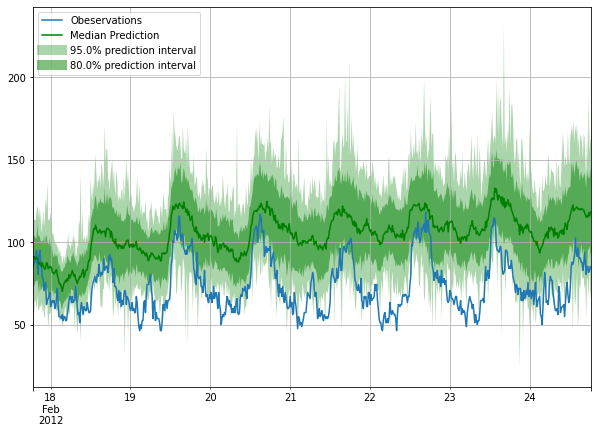

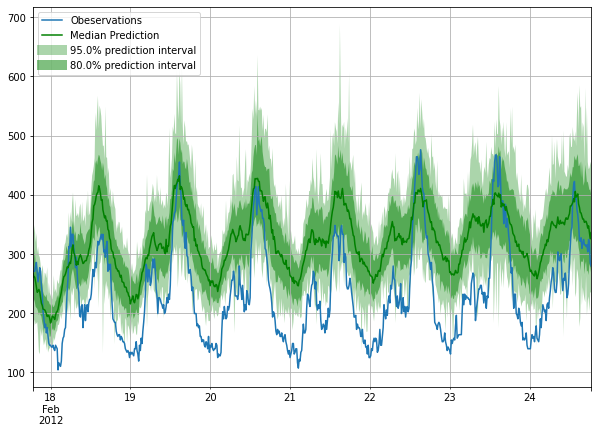

In [ ]:
for i in tqdm(range(6)):
  ts_entry= tss[i]
  forecast_entry= forecasts[i]
  plot_prob_forecast(ts_entry, forecast_entry)

In [ ]:
from gluonts.evaluation import Evaluator
evaluator= Evaluator( quantiles=(.1, .5, .9))
egg_metrics, item_metrics= evaluator( iter(tss), iter(forecasts), 
                                      num_series=len(X_test[0:7]))



Running evaluation: 100%|██████████| 7/7 [00:00<00:00, 165.03it/s]WARNING:gluonts.time_feature.seasonality:Multiple 15 does not divide base seasonality 1. Falling back to seasonality 1.



In [ ]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,1.528280,640.780701,1513.959351,2.252916,0.839750,1.135508,0.360749,0.504537,NaN,9.696812,248.258897,0.068452,640.780719,0.270833,410.627697,0.691964
1,NaN,143.512788,7729.060547,15320.056641,22.797703,0.811912,14.166036,0.540127,0.411909,NaN,87.317156,5759.557696,0.897321,7729.060575,0.994048,2442.349679,1.000000
2,NaN,0.737092,430.291931,984.361450,1.464824,0.114831,5.576169,0.266973,0.493512,NaN,51.390819,306.401467,0.203869,430.291930,0.941964,187.380869,0.991071
3,NaN,3732.455357,37614.480469,98455.281250,146.510835,8.946636,6.256422,0.447777,0.345913,NaN,62.764692,32646.739445,0.772321,37614.482819,0.968750,11824.498497,0.998512
4,NaN,1143.594215,21305.919922,49303.656250,73.368536,4.198207,7.552089,0.475409,0.368860,NaN,62.172188,17578.052353,0.852679,21305.920055,0.992560,6689.859605,1.000000
5,NaN,9561.531250,60212.171875,157196.437500,233.923270,13.675547,6.551946,0.468601,0.358511,NaN,84.197162,60058.340198,0.779762,60212.173103,0.918155,17968.477518,0.985119
6,NaN,4.770039,1283.293579,3665.913086,5.455228,0.594141,3.214157,0.424686,0.334263,NaN,17.497759,507.560671,0.363095,1283.293572,0.809524,590.547872,0.913690


# Multivariate Time Series Modeling Using LSTM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9825b1ae90>,
      dtype=object)

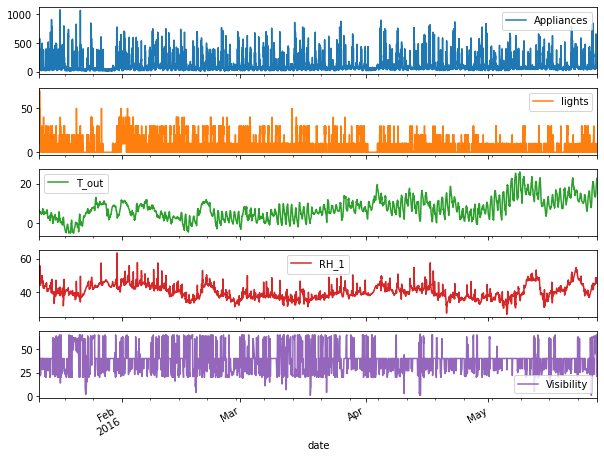

In [ ]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1','Visibility']].plot(subplots=True)

In [ ]:
df_input=df[['Appliances', 'lights', 'T_out', 'RH_1','Visibility']]

In [ ]:
df_input.head()

,Appliances,lights,T_out,RH_1,Visibility
0,60,30,6.600000,47.596667,63.000000
1,60,30,6.483333,46.693333,59.166667
2,50,30,6.366667,46.300000,55.333333
3,50,40,6.250000,46.066667,51.500000
4,60,40,6.133333,46.333333,47.666667


In [ ]:
df_input.describe()

,Appliances,lights,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,7.411665,40.259739,38.330834
std,102.524891,7.935988,5.317409,3.979299,11.794719
min,10.000000,0.000000,-5.000000,27.023333,1.000000
25%,50.000000,0.000000,3.666667,37.333333,29.000000
50%,60.000000,0.000000,6.916667,39.656667,40.000000
75%,100.000000,0.000000,10.408333,43.066667,40.000000
max,1080.000000,70.000000,26.100000,63.360000,66.000000


In [ ]:
df_input.query("Appliances > 500")

,Appliances,lights,T_out,RH_1,Visibility
11,580,60,5.983333,46.396667,40.000000
314,520,0,2.900000,41.530000,36.333333
392,550,10,2.033333,43.433333,40.000000
393,690,10,2.100000,43.766667,40.000000
394,620,10,2.166667,43.693333,40.000000
...,...,...,...,...,...
19586,600,0,20.833333,44.066667,40.000000
19587,520,0,20.900000,43.366667,40.000000
19684,580,0,15.900000,47.226667,61.000000
19685,660,0,16.100000,47.693333,61.000000


In [ ]:
scaler= MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.14285714, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.14285714, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.14285714, 0.87459807, 0.53875791, 0.4       ]])

In [ ]:
features=data_scaled
target=data_scaled[:, 0]

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [ ]:
x_train, x_test, y_train, y_test=train_test_split( features, target, test_size=.2, random_state=42, shuffle=False)

In [ ]:
x_train.shape, 
x_test.shape

(3947, 5)

In [ ]:
win_length=720   # 5 days of data    10mns   6*24*5=720 Observations
batch_size=32
num_features=4
train_generator=TimeseriesGenerator( x_train, y_train, length=win_length, 
                                    sampling_rate=1, batch_size=batch_size)
test_generator=TimeseriesGenerator( x_test, y_test, length=win_length, 
                                    sampling_rate=1, batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.14285714, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.28571429, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.28571429, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.57142857, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.28571429, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.28571429, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.28571429, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.57142857, 0.3617363

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=( win_length, num_features), 
                              return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=.5))
model.add(tf.keras.layers.Dropout(.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          68096     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping( 
    monitor='val_los',
    patience=2,
    mode='min')
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()]
)
history=model.fit(train_generator, epochs=50,
                            validation_data=test_generator,
                            shuffle=False,
                            callbacks=[early_stopping])

Epoch 1/50


InvalidArgumentError: ignored